In [1]:
from functions.load_training_data import training_samples, load_regression_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

# Load Training Samples

In [2]:
start = time.time()
image_samples, image_labels, mask_composites, full_images = training_samples(1000, [1,1,1,1], load_masks=True)
print(time.time() - start)

965.0515010356903


In [3]:
start = time.time()
cropped_imgs, cropped_masks, nuclei_sizes, labels = load_regression_samples(full_images, image_labels, mask_composites)
print(time.time() - start)

1.0975978374481201


In [4]:
nuclei_sizes[:9]

array([ 78.5       , 175.        ,  61.46666667,   0.        ,
       127.        , 471.33333333,   0.        ,  56.        ,
       174.        ])

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


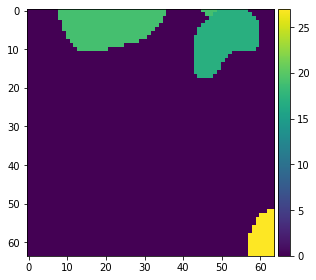

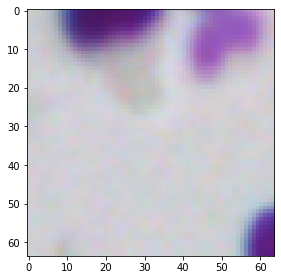

In [5]:
io.imshow(cropped_masks[1]); plt.figure()
io.imshow(cropped_imgs[1], cmap='nipy_spectral')

(array([1.496e+03, 1.580e+02, 1.920e+02, 2.040e+02, 1.800e+02, 1.780e+02,
        1.550e+02, 1.630e+02, 1.270e+02, 1.210e+02, 9.200e+01, 8.200e+01,
        6.300e+01, 6.400e+01, 4.600e+01, 4.900e+01, 6.300e+01, 4.300e+01,
        3.600e+01, 3.200e+01, 2.600e+01, 3.000e+01, 3.000e+01, 1.900e+01,
        2.100e+01, 2.600e+01, 2.200e+01, 1.700e+01, 1.800e+01, 2.400e+01,
        2.000e+01, 1.200e+01, 1.200e+01, 1.700e+01, 8.000e+00, 9.000e+00,
        1.000e+01, 1.500e+01, 1.900e+01, 8.000e+00, 8.000e+00, 8.000e+00,
        6.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 7.000e+00,
        0.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

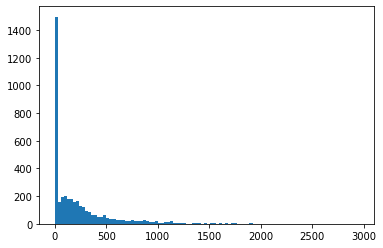

In [6]:
plt.hist(nuclei_sizes, bins=100)
# find the mean of all the values and divide by std. dev
# with mean and std. dev (x= (x-mean)/ std. dev) --> normalized nuclei sizes
# use np to find both ^

# Configure GPU

In [7]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Configure Model

In [8]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [9]:
predictions = model(cropped_imgs).numpy()
predictions

array([[ 0.0042307 ],
       [-0.01075594],
       [ 0.0543593 ],
       ...,
       [-0.04270732],
       [ 0.00115924],
       [ 0.00936258]], dtype=float32)

In [10]:
loss_fn = keras.losses.MeanAbsoluteError(
                reduction="auto", name="mean_absolute_error")
loss_fn(nuclei_sizes, predictions).numpy()

229.38875

In [11]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt, loss=loss_fn, metrics="mean_absolute_error")

In [12]:
model.fit(cropped_imgs, nuclei_sizes, epochs=7, verbose=1)

Epoch 1/7
125/125 [==============================] - 1s 4ms/step - loss: 227.5173 - mean_absolute_error: 227.5173
Epoch 2/7
125/125 [==============================] - 1s 5ms/step - loss: 215.5976 - mean_absolute_error: 215.5976
Epoch 3/7
125/125 [==============================] - 1s 4ms/step - loss: 191.2886 - mean_absolute_error: 191.2886
Epoch 4/7
125/125 [==============================] - 0s 4ms/step - loss: 179.6013 - mean_absolute_error: 179.6013
Epoch 5/7
125/125 [==============================] - 1s 5ms/step - loss: 176.9002 - mean_absolute_error: 176.9002
Epoch 6/7
125/125 [==============================] - 0s 4ms/step - loss: 172.8517 - mean_absolute_error: 172.8517
Epoch 7/7
125/125 [==============================] - 1s 4ms/step - loss: 168.1370 - mean_absolute_error: 168.1370
